#  Descriptive Statistics with Sports Data
Using the VALD Performance Symmetry Dataset


This notebook introduces fundamental statistical and data cleaning concepts using real athlete symmetry data.

We will explore:
- Descriptive statistics (mean, median, std)
- Data cleaning basics
- Visualizations (histogram, boxplot)
- Distribution analysis (skewness, kurtosis)
- Player-wise performance comparisons


##  Dataset Overview
Let's load and inspect the dataset.

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('preprocessed_vald_data.csv')

print(df.head())

                        testDateUtc     sport  leftAvgForce  leftImpulse  \
0  2022-01-20 17:28:39.286000+00:00  baseball    407.416667     3073.945   
1  2022-01-26 21:13:21.649000+00:00  baseball    397.166667     3706.670   
2  2022-02-04 21:10:17.929000+00:00  baseball    332.500000     3170.955   
3  2022-02-11 21:19:29.340000+00:00  baseball    314.000000     3357.330   
4  2022-08-16 12:20:49.186000+00:00  baseball    437.750000     3514.465   

   leftMaxForce  leftTorque  rightAvgForce  rightImpulse  rightMaxForce  \
0        427.75  182.863125     400.000000      2929.385         410.75   
1        406.25  173.671875     348.333333      3643.385         376.50   
2        424.75  181.580625     316.437500      3190.170         400.00   
3        387.25  165.549375     295.125000      3138.025         364.50   
4        443.25  189.489375     443.000000      3622.290         449.25   

   rightTorque  ForceSymmetry  ImpulseSymmetry  MaxForceSymmetry  \
0   175.595625       1.0

##  Data Cleaning Basics

In [46]:

# Check for nulls
print(df.isnull().sum())

# Data types
print(df.dtypes)

print(df.describe().T[['mean', 'std', 'min', '25%', '50%', '75%', 'max']])


testDateUtc         6
sport               0
leftAvgForce        0
leftImpulse         0
leftMaxForce        0
leftTorque          0
rightAvgForce       0
rightImpulse        0
rightMaxForce       0
rightTorque         0
ForceSymmetry       0
ImpulseSymmetry     0
MaxForceSymmetry    0
TorqueSymmetry      0
sbu_id              0
dtype: int64
testDateUtc          object
sport                object
leftAvgForce        float64
leftImpulse         float64
leftMaxForce        float64
leftTorque          float64
rightAvgForce       float64
rightImpulse        float64
rightMaxForce       float64
rightTorque         float64
ForceSymmetry       float64
ImpulseSymmetry     float64
MaxForceSymmetry    float64
TorqueSymmetry      float64
sbu_id               object
dtype: object
                         mean          std        min          25%  \
leftAvgForce       371.669719   108.456028  39.000000   288.562500   
leftImpulse       4437.066498  2489.279418  16.040000  2500.543750   
leftMaxForce 

##  Descriptive Statistics

In [47]:
print(df.describe()[[
    'leftAvgForce', 'rightAvgForce',
    'leftImpulse', 'rightImpulse',
    'ForceSymmetry', 'ImpulseSymmetry'
]])




       leftAvgForce  rightAvgForce   leftImpulse  rightImpulse  ForceSymmetry  \
count   6928.000000    6928.000000   6928.000000   6928.000000    6928.000000   
mean     371.669719     357.254382   4437.066498   4190.166090       1.046158   
std      108.456028     103.725881   2489.279418   2405.690824       0.124326   
min       39.000000      60.750000     16.040000     12.095000       0.733426   
25%      288.562500     278.312500   2500.543750   2313.152500       0.966067   
50%      357.583333     345.937500   4033.292500   3810.675000       1.038356   
75%      444.875000     431.791667   5892.785000   5582.970000       1.120945   
max      751.625000     772.250000  17412.330000  15664.305000       1.353802   

       ImpulseSymmetry  
count      6928.000000  
mean          1.077990  
std           0.162305  
min           0.673744  
25%           0.972068  
50%           1.062266  
75%           1.170015  
max           1.468379  


In [48]:
df['sbu_id'].value_counts().head()


a068e8c2    74
65dd39d3    72
a330580f    70
2a0aae70    68
beb1f4cc    66
Name: sbu_id, dtype: int64

##  Mean, Median, Mode, Skewness

In [49]:
from scipy.stats import mode

print("Mean Impulse Symmetry:", df['ImpulseSymmetry'].mean())
print("Median Impulse Symmetry:", df['ImpulseSymmetry'].median())
print("Skewness:", df['ImpulseSymmetry'].skew())


Mean Impulse Symmetry: 1.077990480808066
Median Impulse Symmetry: 1.062266010637209
Skewness: 0.3697546492112125


##  Visualizing Distributions

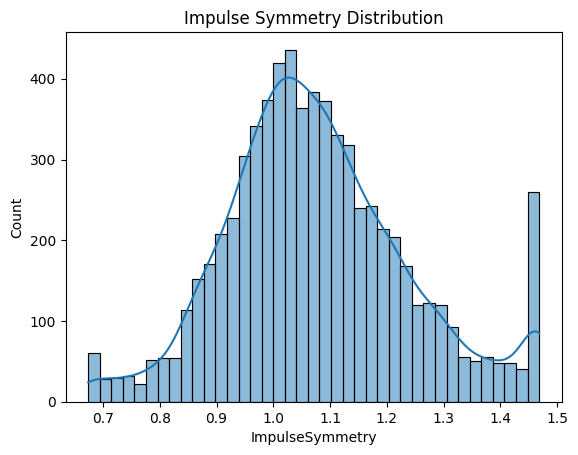

In [50]:
sns.histplot(df['ImpulseSymmetry'], kde=True)
plt.title('Impulse Symmetry Distribution')
plt.show()


<Axes: title={'center': 'Boxplot of leftAvgForce and rightAvgForce'}>

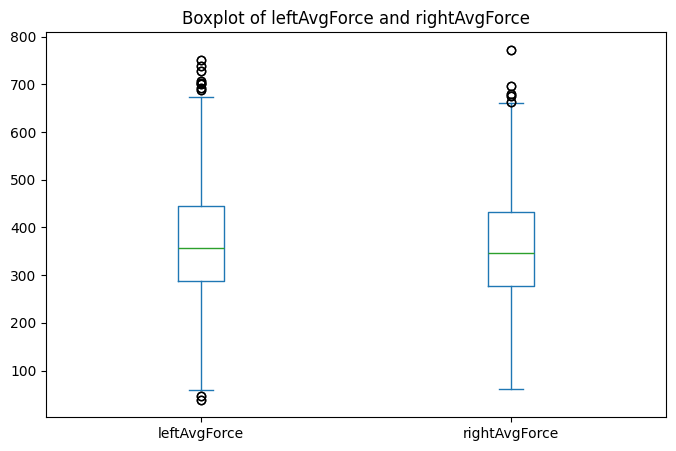

In [51]:
df[['leftAvgForce', 'rightAvgForce']].plot(kind='box', figsize=(8, 5), title='Boxplot of leftAvgForce and rightAvgForce')
# df[['leftAvgForce', 'rightAvgForce']].plot(kind='hist', alpha=0.6,bins=30, title='Histogram of leftAvgForce and rightAvgForce')



## Distribution of Left and Right Average Force

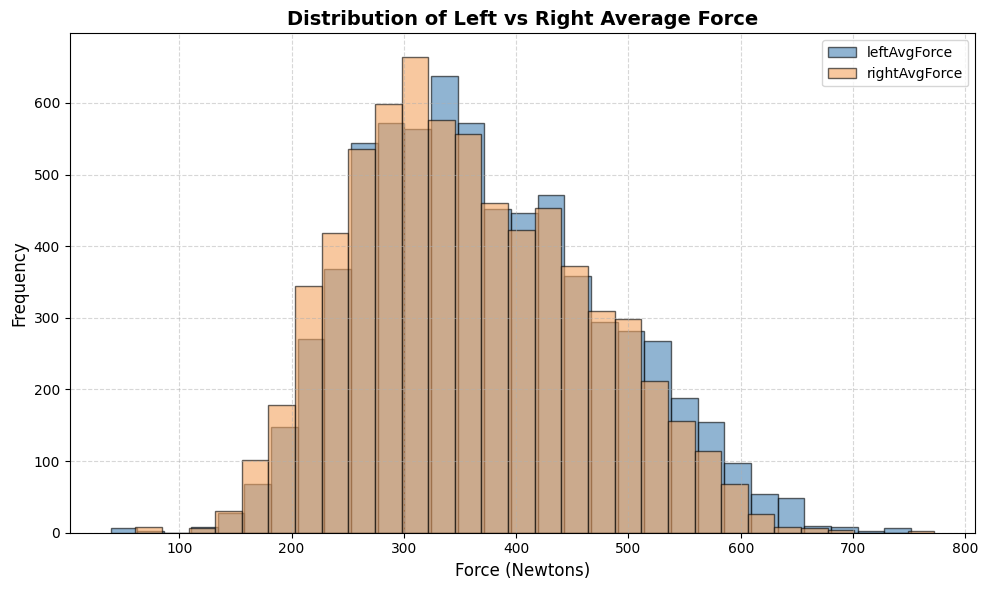

In [52]:
plt.figure(figsize=(10, 6))
plt.hist(df['leftAvgForce'], bins=30, alpha=0.6, label='leftAvgForce', color='steelblue', edgecolor='black')
plt.hist(df['rightAvgForce'], bins=30, alpha=0.6, label='rightAvgForce', color='sandybrown', edgecolor='black')
plt.title('Distribution of Left vs Right Average Force', fontsize=14, fontweight='bold')
plt.xlabel('Force (Newtons)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

##  Boxplots to Identify Outliers

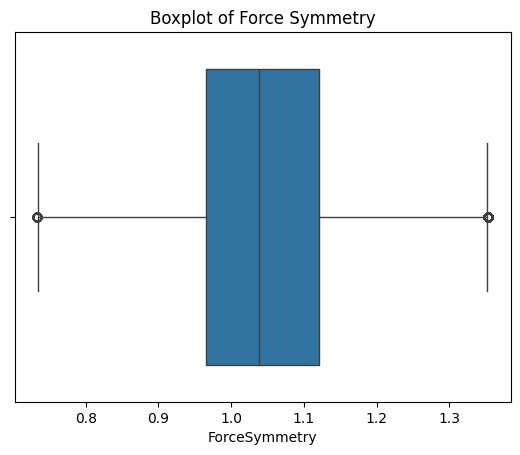

In [53]:
sns.boxplot(x=df['ForceSymmetry'])
plt.title('Boxplot of Force Symmetry')
plt.show()


##  Frequency Distribution per Player

In [54]:

df['sbu_id'].value_counts().head()


a068e8c2    74
65dd39d3    72
a330580f    70
2a0aae70    68
beb1f4cc    66
Name: sbu_id, dtype: int64

##  Grouped Averages per Player

In [55]:

df.groupby('sbu_id')[['ForceSymmetry', 'ImpulseSymmetry']].mean().head()


,ForceSymmetry,ImpulseSymmetry
sbu_id,,
0001b201,1.062764,1.006273
02625281,1.044407,1.199122
02a46600,1.028301,1.040774
02c866d0,0.942752,0.846286
037cdf07,1.017258,1.066305


##  Ratio Metrics

In [56]:

df['force_ratio'] = df['leftAvgForce'] / df['rightAvgForce']
df['impulse_ratio'] = df['leftImpulse'] / df['rightImpulse']
df[['force_ratio', 'impulse_ratio']].describe()


,force_ratio,impulse_ratio
count,6928.000000,6928.000000
mean,1.049159,1.088031
std,0.140663,0.241670
min,0.338509,0.283250
25%,0.966067,0.972068
50%,1.038356,1.062266
75%,1.120945,1.170015
max,2.323752,7.265421


In [57]:
Q1=df["impulse_ratio"].quantile(0.25)
Q3=df["impulse_ratio"].quantile(0.75)
IQR=Q3-Q1
print("IQR of impulse_ratio is:",IQR)

lower=Q1-1.5*IQR
upper=Q3+1.5*IQR

clean_df=df[(df["impulse_ratio"]>=lower)&(df["impulse_ratio"]<=upper)]
print(clean_df["impulse_ratio"].describe())

IQR of impulse_ratio is: 0.19794653799456752
count    6646.000000
mean        1.067643
std         0.144221
min         0.675617
25%         0.971047
50%         1.055399
75%         1.158496
max         1.466281
Name: impulse_ratio, dtype: float64


# Central tendency
## Mean and median by player

In [58]:
df.groupby('sbu_id')[['leftAvgForce', 'rightAvgForce']].agg(['mean', 'median']).head()

leftAvgForce             rightAvgForce            
                 mean      median          mean      median
sbu_id                                                     
0001b201   364.465278  350.916667    342.756944  335.520833
02625281   258.647727  261.625000    248.344697  243.416667
02a46600   344.890625  354.500000    336.031250  352.458333
02c866d0   210.125000  210.125000    222.062500  222.062500
037cdf07   358.631410  367.666667    352.253205  376.500000